In [1]:
"""
This part of code is the Q learning brain, which is a brain of the agent.
All decisions are made in here.

View more ``on my tutorial page: https://morvanzhou.github.io/tutorials/
"""
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
class QLearningTable:
    def __init__(self,learning_rate=0.05, reward_decay=0.9, e_greedy=0.3):
        self.actions = ["c","d"] 
        self.lr = learning_rate
        self.gamma = reward_decay
        self.epsilon = e_greedy
        self.q_table = pd.DataFrame(columns=self.actions, dtype=np.float64)

    def choose_action(self, observation,g):
        self.check_state_exist(observation,g)
        # action selection
        if np.random.uniform(0,1) > self.epsilon:
            # choose best action
            state_action = self.q_table.loc[observation, :]
            # some actions may have the same value, randomly choose on in these actions
            action = np.random.choice(state_action[state_action == np.max(state_action)].index)
        else:
            # choose random action
            action = np.random.choice(self.actions)
        return action
    
    def learn(self,current_state,action,g,next_state,reward):
        self.check_state_exist(next_state,g)
        q_predict = self.q_table.loc[current_state, action]
        q_target = q_predict + self.lr*(reward + self.gamma*np.max(self.q_table.loc[next_state,:]) - q_predict )
#         if action == "c":
#             q_target = q_predict + self.lr*(1- self.epsilon/2)*((1- self.epsilon/2)*2*g + self.epsilon/2 * g + (self.gamma - 1)*q_predict)
#         elif action == "d":
#             q_target = q_predict + self.lr* self.epsilon/2 *((1- self.epsilon/2)*(2+g) + self.epsilon * g + (self.gamma*self.q_table.loc[next_state, "c"] - self.q_table.loc[next_state, action]))

        
        
        self.q_table.loc[current_state,action] = q_target

    def check_state_exist(self, state,g):
        if state not in self.q_table.index:
            # append new state to q table
            self.q_table = self.q_table.append(
                pd.Series(
                    [2*g/(1-self.gamma)]*len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

In [ ]:
#create the environment for IPD and run the experiment and plot the graphs. 
import pdb
# g = 1.8


def collect(observation,store_dict):
    if observation not in store_dict:
        store_dict[observation] = 1
    else: 
        store_dict[observation]+=1

def reward_joint(action1,action2,g):
    payoff_matrix = {
                     "cc": [2*g,2*g],
                     "cd":[g,2+g],
                     "dc": [2+g,g],
                     "dd":[2,2]
                    }
    return payoff_matrix[action1 + action2]
    
def update(g):
    state_data = {}
    action1_data = {}
    action2_data = {}
    q_learning_1 = []
    q_learning_2 = []
    for episode in range(10):
        # initial observation

        agent1 = QLearningTable()
        agent2 = QLearningTable()
        observation = "cc"
    #     pdb.set_trace()
        for iterations in range(100000):

            # RL choose action based on observation
            action1 = agent1.choose_action(str(observation),g)
            action2 = agent2.choose_action(str(observation),g)
            
            collect(action1,action1_data)
            collect(action2,action2_data)

            # RL take action and get next observation and reward
            observation_ = action1 + action2
            reward = reward_joint(action1,action2,g)
    #         pdb.set_trace()
            # RL learn from this transition
            agent1.learn(str(observation), action1,g,str(observation_),reward[0])
            agent2.learn(str(observation), action2,g,str(observation_),reward[1])

            # swap observation
            observation = observation_
            collect(observation,state_data)
            if episode == 9: 
                q_learning_1.append(agent1.q_table)
                q_learning_2.append(agent2.q_table)
            

            # break while loop when end of this episode
    #             if done:
    #                 break
        print(f"Game {episode} ends in state {observation} for player 1 and player 2")

    print(state_data)
    g_state_data[g] = state_data
    g_action1_data[g] = action1_data
    g_action2_data[g] = action2_data
    g_qlearning1_data[g] = q_learning_1
    g_qlearning2_data[g] = q_learning_2
    # end of game
    print('game over')


In [ ]:
g_state_data = {}
g_action1_data = {}
g_action2_data = {}
g_qlearning1_data = {}
g_qlearning2_data = {}

In [10]:
g_qlearning1_data = {}
g_qlearning2_data = {}

In [ ]:
from multiprocessing import Pool

if __name__ == '__main__':
    with Pool(4) as p:
        print(p.map(update, [1.2,1.4,1.6,1.8]))

Fraction of runs where the agents learn the Nash Equilibrium {D,D}. 

Fraction of time where cooperation is a player’s preferred action in a single run for various values of g.

Q_value obtained by player 1 for g 1.8

Q_value obtained by player 2 for g 1.8

In [46]:
# update(2)

Game 0 ends in state cc for player 1 and player 2
Game 1 ends in state cd for player 1 and player 2
Game 2 ends in state cc for player 1 and player 2
Game 3 ends in state cc for player 1 and player 2
Game 4 ends in state cc for player 1 and player 2
Game 5 ends in state cc for player 1 and player 2
Game 6 ends in state cc for player 1 and player 2
Game 7 ends in state cc for player 1 and player 2
Game 8 ends in state cc for player 1 and player 2
Game 9 ends in state cc for player 1 and player 2
{'dd': 68880, 'cc': 640810, 'dc': 147742, 'cd': 142568}
game over


In [47]:
g_state_data

{1: {'cd': 127820, 'dd': 722884, 'dc': 126864, 'cc': 22432},
 1.2: {'dd': 720882, 'cc': 23462, 'dc': 127808, 'cd': 127848},
 1.4: {'cc': 33250, 'cd': 130863, 'dc': 130851, 'dd': 705036},
 1.6: {'dd': 616639, 'dc': 151818, 'cc': 79247, 'cd': 152296},
 1.8: {'dd': 251891, 'cd': 185396, 'dc': 184479, 'cc': 378234},
 2: {'dd': 68880, 'cc': 640810, 'dc': 147742, 'cd': 142568}}

In [48]:
g_list = list(g_state_data)

In [49]:
fraction = []

In [50]:
for k,x in g_state_data.items():
    print(x['dd'] + x['dc'] + x['cd'] + x['cc'])
    fraction.append(x['dd']*100/(x['dd'] + x['dc'] + x['cd'] + x['cc']))

1000000
1000000
1000000
1000000
1000000
1000000


In [51]:
fraction

[72.2884, 72.0882, 70.5036, 61.6639, 25.1891, 6.888]

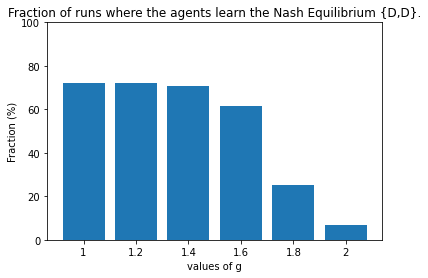

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
labels = ['1', '1.2', '1.4', '1.6', '1.8','2']
plt.xticks(range(len(fraction)), labels)
plt.ylim([0,100])
plt.xlabel('values of g')
plt.ylabel('Fraction (%)')
plt.title('Fraction of runs where the agents learn the Nash Equilibrium {D,D}.')
plt.bar(range(len(fraction)), fraction) 
plt.show()
# plt.xlim([1, 2])
# plt.ylim([0,100])
# plt.bar(fraction)

# plt.s
# how()

In [60]:
g_action1_data

{1: {'c': 150252, 'd': 849748},
 1.2: {'d': 848690, 'c': 151310},
 1.4: {'c': 164113, 'd': 835887},
 1.6: {'d': 768457, 'c': 231543},
 1.8: {'d': 436370, 'c': 563630},
 2: {'d': 216622, 'c': 783378}}

In [62]:
fraction_action_c = []
for k,v in g_action1_data.items():
    fraction_action_c.append(v['c']/(v['c']+v['d']))

In [63]:
fraction_action_c

[0.150252, 0.15131, 0.164113, 0.231543, 0.56363, 0.783378]

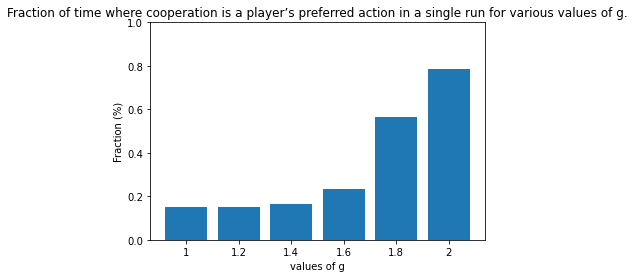

In [65]:
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
labels = ['1', '1.2', '1.4', '1.6', '1.8','2']
plt.xticks(range(len(fraction_action_c)), labels)
plt.ylim([0,1])
plt.xlabel('values of g')
plt.ylabel('Fraction (%)')
plt.title('Fraction of time where cooperation is a player’s preferred action in a single run for various values of g.')
plt.bar(range(len(fraction_action_c)), fraction_action_c) 
plt.show()

In [81]:
list_q_value_1 = []
for x in g_qlearning1_data[1.8]: 
    list_q_value_1.append(np.max(x["c"]))

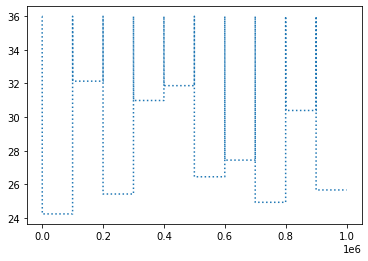

In [92]:
plt.plot(np.arange(0,len(list_q_value_1),1),list_q_value_1, linestyle = 'dotted')
plt.show()

In [93]:
np.arange(0,len(list_q_value_1),1)

array([     0,      1,      2, ..., 999997, 999998, 999999])